# SPARKLING

# 1. Read the data as an appropriate Time Series data and plot the data.


In [1]:
pip install numpy --upgrade


Note: you may need to restart the kernel to use updated packages.


In [175]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
import statsmodels
import statsmodels.tools.eval_measures as      em
import sklearn
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt
from warnings import filterwarnings
filterwarnings("ignore")
from    pandas                   import   read_csv, Grouper, DataFrame, concat
from    datetime                 import   datetime

In [176]:
print('Numpy version:',np.__version__)
print('Pandas version:',pd.__version__)
print('Seaborn version:',sns.__version__)
print('Matplotlib version:',matplotlib.__version__)
print('Sklearn version:',sklearn.__version__)
print('Statsmodels version:',statsmodels.__version__)

Numpy version: 1.23.5
Pandas version: 1.4.2
Seaborn version: 0.12.0
Matplotlib version: 3.5.1
Sklearn version: 1.0.2
Statsmodels version: 0.13.5


In [177]:
dfr = pd.read_csv("Sparkling.csv")

In [178]:
dfr.head()

,YearMonth,Sparkling
0,1980-01,1686
1,1980-02,1591
2,1980-03,2304
3,1980-04,1712
4,1980-05,1471


In [179]:
dfr.isnull().sum()

YearMonth    0
Sparkling    0
dtype: int64

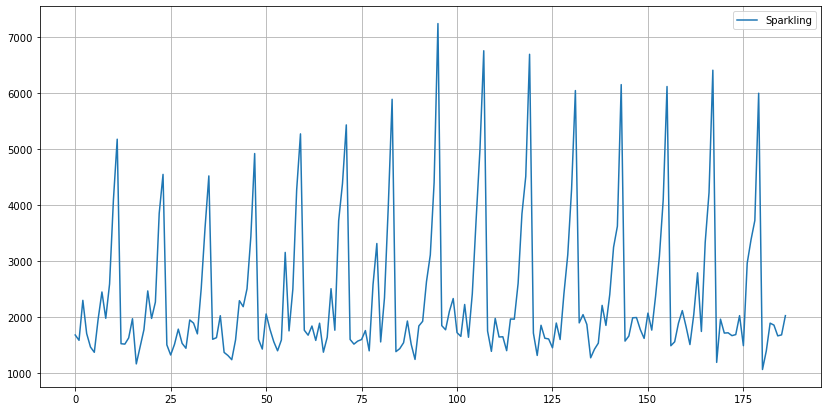

In [180]:
dfr.plot();
plt.grid()

In [181]:
date = pd.date_range(start='1/1/1980', end='8/1/1995', freq='M')
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [182]:
dfr['Time_Stamp'] = pd.DataFrame(date,columns=['Month'])
dfr.head()


,YearMonth,Sparkling,Time_Stamp
0,1980-01,1686,1980-01-31
1,1980-02,1591,1980-02-29
2,1980-03,2304,1980-03-31
3,1980-04,1712,1980-04-30
4,1980-05,1471,1980-05-31


In [183]:
dfr.set_index(keys='Time_Stamp',drop=True,inplace=True)
dfr.head()

,YearMonth,Sparkling
Time_Stamp,,
1980-01-31,1980-01,1686
1980-02-29,1980-02,1591
1980-03-31,1980-03,2304
1980-04-30,1980-04,1712
1980-05-31,1980-05,1471


In [184]:
dfr.drop(labels=['YearMonth'],axis=1,inplace=True)
dfr.head()

,Sparkling
Time_Stamp,
1980-01-31,1686
1980-02-29,1591
1980-03-31,2304
1980-04-30,1712
1980-05-31,1471


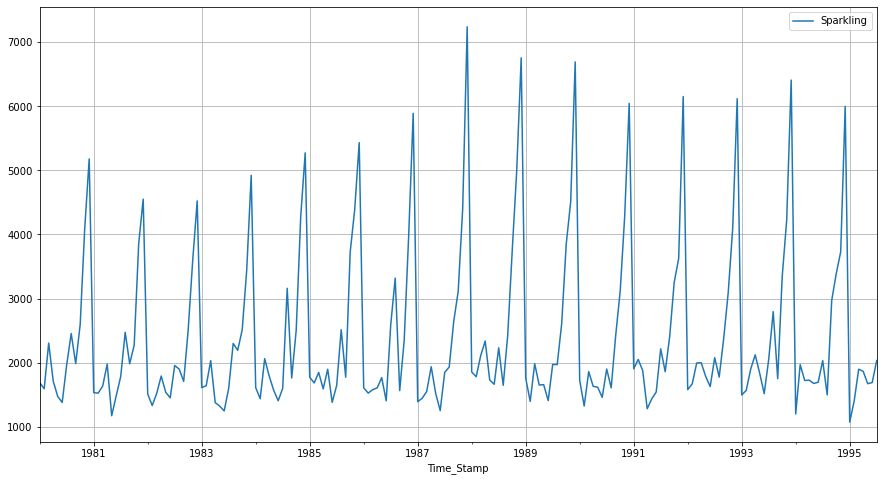

In [185]:
from pylab import rcParams


rcParams['figure.figsize'] = 15,8

dfr.plot()
plt.grid();

# 2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.


In [186]:
dfr.describe()

,Sparkling
count,187.000000
mean,2402.417112
std,1295.111540
min,1070.000000
25%,1605.000000
50%,1874.000000
75%,2549.000000
max,7242.000000


In [187]:
dfr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-31 to 1995-07-31
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


In [188]:
dfr.shape

(187, 1)

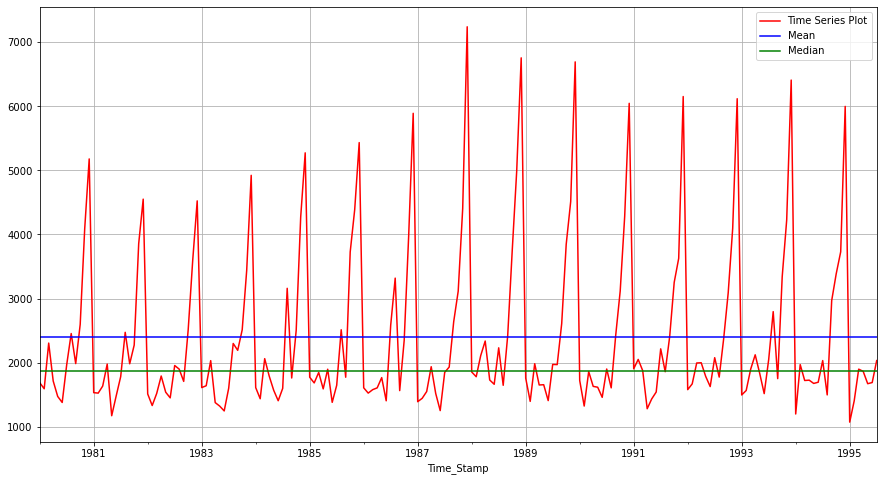

In [189]:
dfr.plot(color='red')
plt.axhline(dfr['Sparkling'].mean(),color='Blue')
plt.axhline(dfr['Sparkling'].median(),color='Green')
plt.grid()
plt.legend(['Time Series Plot','Mean','Median']);

In [192]:
dfr.index.month_name


<bound method _inherit_from_data.<locals>.method of DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', name='Time_Stamp', length=187, freq=None)>

In [193]:
quarterly_sales_across_years = pd.pivot_table(dfr, values = 'Sparkling', columns = dfr.index.month_name(), index = dfr.index.year)
quarterly_sales_across_years

Time_Stamp,April,August,December,February,January,July,June,March,May,November,October,September
Time_Stamp,,,,,,,,,,,,
1980,1712.0,2453.0,5179.0,1591.0,1686.0,1966.0,1377.0,2304.0,1471.0,4087.0,2596.0,1984.0
1981,1976.0,2472.0,4551.0,1523.0,1530.0,1781.0,1480.0,1633.0,1170.0,3857.0,2273.0,1981.0
1982,1790.0,1897.0,4524.0,1329.0,1510.0,1954.0,1449.0,1518.0,1537.0,3593.0,2514.0,1706.0
1983,1375.0,2298.0,4923.0,1638.0,1609.0,1600.0,1245.0,2030.0,1320.0,3440.0,2511.0,2191.0
1984,1789.0,3159.0,5274.0,1435.0,1609.0,1597.0,1404.0,2061.0,1567.0,4273.0,2504.0,1759.0
1985,1589.0,2512.0,5434.0,1682.0,1771.0,1645.0,1379.0,1846.0,1896.0,4388.0,3727.0,1771.0
1986,1605.0,3318.0,5891.0,1523.0,1606.0,2584.0,1403.0,1577.0,1765.0,3987.0,2349.0,1562.0
1987,1935.0,1930.0,7242.0,1442.0,1389.0,1847.0,1250.0,1548.0,1518.0,4405.0,3114.0,2638.0
1988,2336.0,1645.0,6757.0,1779.0,1853.0,2230.0,1661.0,2108.0,1728.0,4988.0,3740.0,2421.0


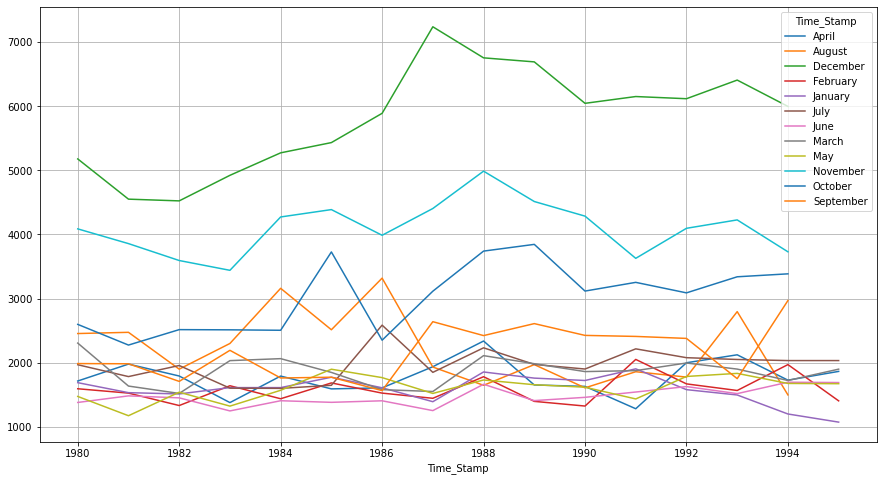

In [194]:
quarterly_sales_across_years.plot()
plt.grid()

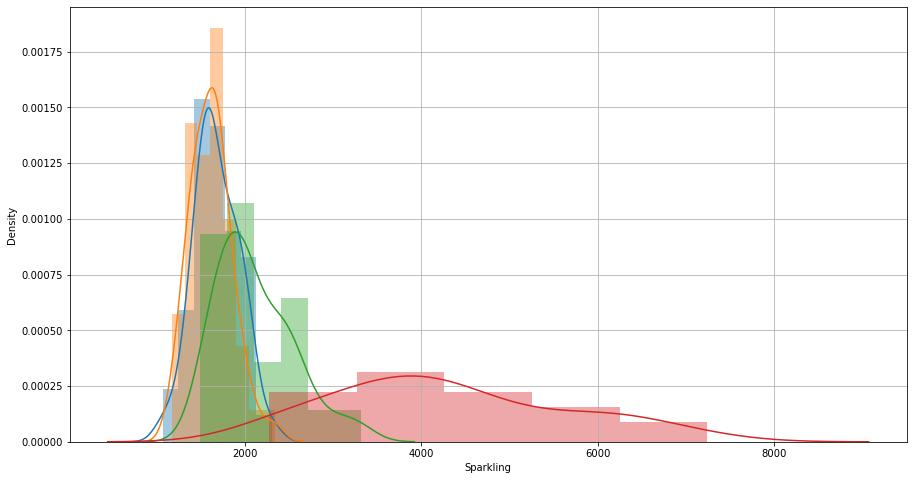

In [18]:
sns.distplot(dfr.loc[dfr.index.quarter == 1]['Sparkling'])
sns.distplot(dfr.loc[dfr.index.quarter == 2]['Sparkling'])
sns.distplot(dfr.loc[dfr.index.quarter == 3]['Sparkling'])
sns.distplot(dfr.loc[dfr.index.quarter == 4]['Sparkling'])
plt.grid();

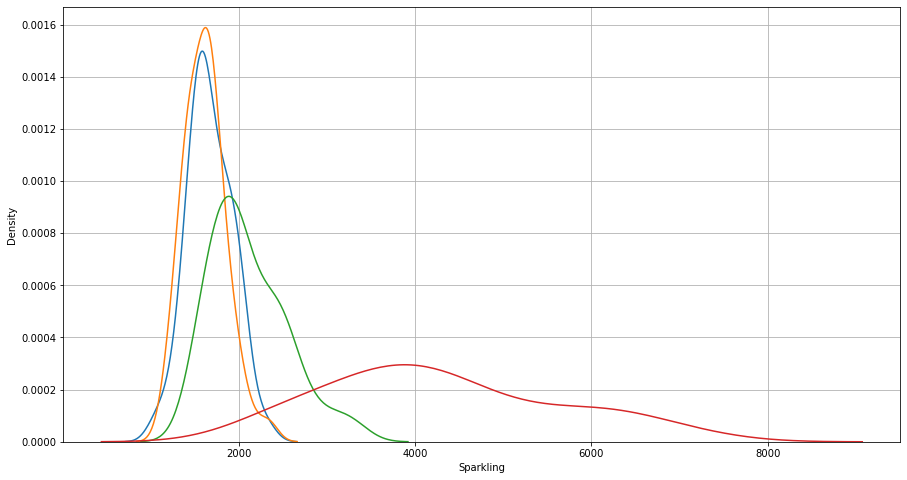

In [19]:
sns.distplot(dfr.loc[dfr.index.quarter == 1]['Sparkling'],hist=False)
sns.distplot(dfr.loc[dfr.index.quarter == 2]['Sparkling'],hist=False)
sns.distplot(dfr.loc[dfr.index.quarter == 3]['Sparkling'],hist=False)
sns.distplot(dfr.loc[dfr.index.quarter == 4]['Sparkling'],hist=False)
plt.grid();

In [20]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

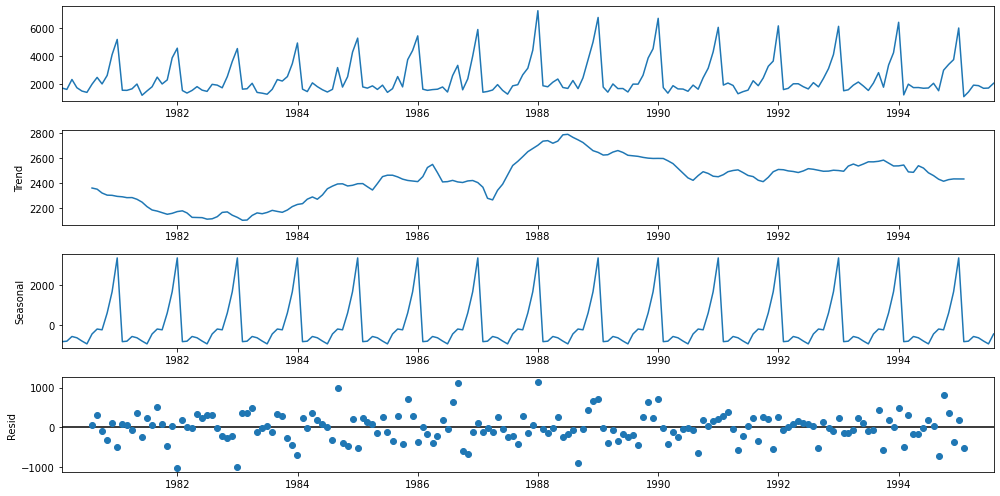

In [21]:
from pylab import rcParams
rcParams['figure.figsize'] = 14, 7

decomposition = seasonal_decompose(dfr,model='additive')
decomposition.plot();

In [22]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

In [23]:
print('Trend','\n',trend,'\n')
print('Seasonality','\n',seasonality,'\n')
print('Residual','\n',residual,'\n')

Trend 
 Time_Stamp
1980-01-31   NaN
1980-02-29   NaN
1980-03-31   NaN
1980-04-30   NaN
1980-05-31   NaN
              ..
1995-03-31   NaN
1995-04-30   NaN
1995-05-31   NaN
1995-06-30   NaN
1995-07-31   NaN
Name: trend, Length: 187, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31   -854.260599
1980-02-29   -830.350678
1980-03-31   -592.356630
1980-04-30   -658.490559
1980-05-31   -824.416154
                 ...    
1995-03-31   -592.356630
1995-04-30   -658.490559
1995-05-31   -824.416154
1995-06-30   -967.434011
1995-07-31   -465.502265
Name: seasonal, Length: 187, dtype: float64 

Residual 
 Time_Stamp
1980-01-31   NaN
1980-02-29   NaN
1980-03-31   NaN
1980-04-30   NaN
1980-05-31   NaN
              ..
1995-03-31   NaN
1995-04-30   NaN
1995-05-31   NaN
1995-06-30   NaN
1995-07-31   NaN
Name: resid, Length: 187, dtype: float64 



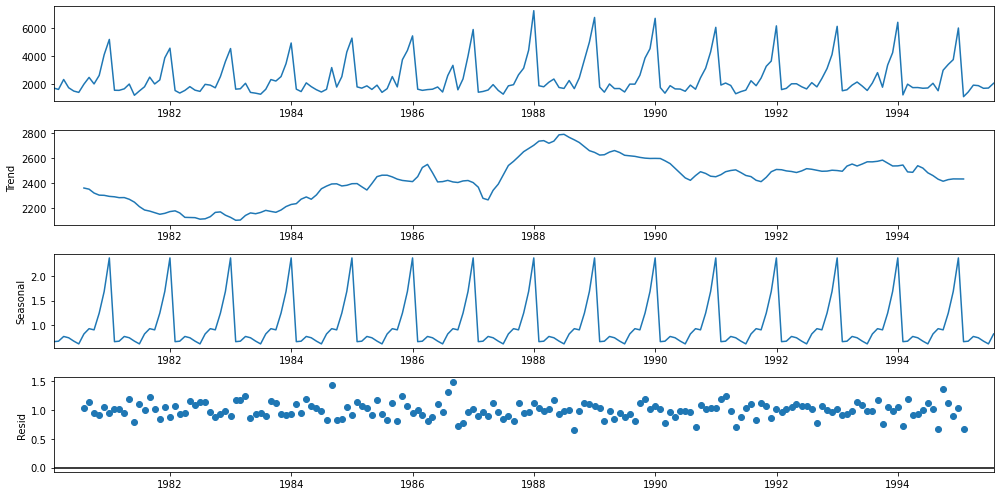

In [24]:
from pylab import rcParams
rcParams['figure.figsize'] = 14, 7

decomposition = seasonal_decompose(dfr,model='multiplicative')
decomposition.plot();

In [25]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

In [26]:
print('Trend','\n',trend,'\n')
print('Seasonality','\n',seasonality,'\n')
print('Residual','\n',residual,'\n')

Trend 
 Time_Stamp
1980-01-31   NaN
1980-02-29   NaN
1980-03-31   NaN
1980-04-30   NaN
1980-05-31   NaN
              ..
1995-03-31   NaN
1995-04-30   NaN
1995-05-31   NaN
1995-06-30   NaN
1995-07-31   NaN
Name: trend, Length: 187, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    0.649843
1980-02-29    0.659214
1980-03-31    0.757440
1980-04-30    0.730351
1980-05-31    0.660609
                ...   
1995-03-31    0.757440
1995-04-30    0.730351
1995-05-31    0.660609
1995-06-30    0.603468
1995-07-31    0.809164
Name: seasonal, Length: 187, dtype: float64 

Residual 
 Time_Stamp
1980-01-31   NaN
1980-02-29   NaN
1980-03-31   NaN
1980-04-30   NaN
1980-05-31   NaN
              ..
1995-03-31   NaN
1995-04-30   NaN
1995-05-31   NaN
1995-06-30   NaN
1995-07-31   NaN
Name: resid, Length: 187, dtype: float64 



# 3. Split the data into training and test. The test data should start in 1991.


In [27]:
train             = dfr[dfr.index<'1991'] 
test              = dfr[dfr.index>'1991']

In [28]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


In [29]:
# Printing the Rose Data
print('Training Data')
display(train)
print('Test Data')
display(test)

Training Data


,Sparkling
Time_Stamp,
1980-01-31,1686
1980-02-29,1591
1980-03-31,2304
1980-04-30,1712
1980-05-31,1471
...,...
1990-08-31,1605
1990-09-30,2424
1990-10-31,3116


Test Data


,Sparkling
Time_Stamp,
1991-01-31,1902
1991-02-28,2049
1991-03-31,1874
1991-04-30,1279
1991-05-31,1432
1991-06-30,1540
1991-07-31,2214
1991-08-31,1857
1991-09-30,2408


# 4. Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models and simple average models. should also be built on the training data and check the performance on the test data using RMSE.


In [30]:
# create class
model_SES = SimpleExpSmoothing(train,initialization_method='estimated')

In [31]:
# Fitting the Simple Exponential Smoothing model and asking python to choose the optimal parameters
model_SES_autofit = model_SES.fit(optimized=True)

In [32]:
## Let us check the parameters

model_SES_autofit.params

{'smoothing_level': 0.07029120741395753,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1764.0137027194548,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [33]:
# Using the fitted model on the training set to forecast on the test set
SES_predict = model_SES_autofit.forecast(steps=len(test))
SES_predict

1991-01-31    2804.675123
1991-02-28    2804.675123
1991-03-31    2804.675123
1991-04-30    2804.675123
1991-05-31    2804.675123
1991-06-30    2804.675123
1991-07-31    2804.675123
1991-08-31    2804.675123
1991-09-30    2804.675123
1991-10-31    2804.675123
1991-11-30    2804.675123
1991-12-31    2804.675123
1992-01-31    2804.675123
1992-02-29    2804.675123
1992-03-31    2804.675123
1992-04-30    2804.675123
1992-05-31    2804.675123
1992-06-30    2804.675123
1992-07-31    2804.675123
1992-08-31    2804.675123
1992-09-30    2804.675123
1992-10-31    2804.675123
1992-11-30    2804.675123
1992-12-31    2804.675123
1993-01-31    2804.675123
1993-02-28    2804.675123
1993-03-31    2804.675123
1993-04-30    2804.675123
1993-05-31    2804.675123
1993-06-30    2804.675123
1993-07-31    2804.675123
1993-08-31    2804.675123
1993-09-30    2804.675123
1993-10-31    2804.675123
1993-11-30    2804.675123
1993-12-31    2804.675123
1994-01-31    2804.675123
1994-02-28    2804.675123
1994-03-31  

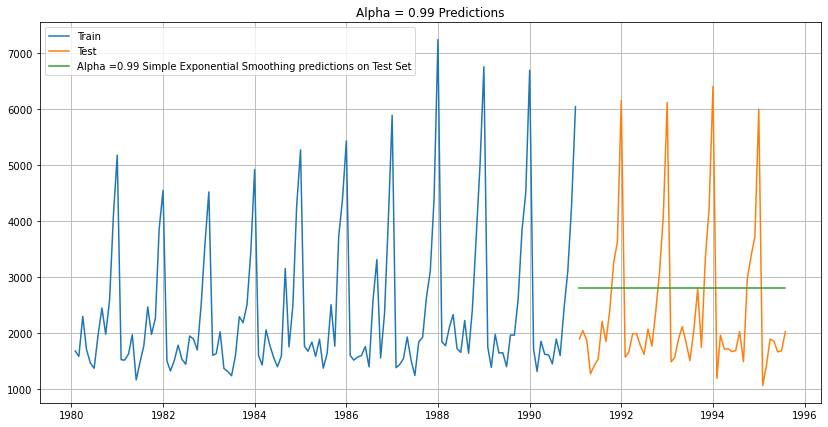

In [34]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha =0.99 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.99 Predictions');

In [35]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


In [36]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [37]:
print('SES RMSE:',mean_squared_error(test.values,SES_predict.values,squared=False))
#different way to calculate RMSE
print('SES RMSE (calculated using statsmodels):',em.rmse(test.values,SES_predict.values)[0])

SES RMSE: 1338.0083842215713
SES RMSE (calculated using statsmodels): 1338.0083842215713


In [38]:
resultsDf = pd.DataFrame({'Test RMSE': [em.rmse(test.values,SES_predict.values)[0]]},index=['Alpha=0.99,SES'])
resultsDf

,Test RMSE
"Alpha=0.99,SES",1338.008384


In [39]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(train,initialization_method='estimated')
# Fitting the model

# Fitting the Simple Exponential Smoothing model and asking python to choose the optimal parameters
model_DES = model_DES.fit(optimized=True)

print('')
print('==Holt model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_DES.params)


==Holt model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.6649999999999999, 'smoothing_trend': 0.0001, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1502.1999999999998, 'initial_trend': 74.87272727272739, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [40]:
# Forecasting using this model for the duration of the test set
DES_predict =  model_DES.forecast(len(test))
DES_predict

1991-01-31    5401.733026
1991-02-28    5476.005230
1991-03-31    5550.277433
1991-04-30    5624.549637
1991-05-31    5698.821840
1991-06-30    5773.094044
1991-07-31    5847.366248
1991-08-31    5921.638451
1991-09-30    5995.910655
1991-10-31    6070.182858
1991-11-30    6144.455062
1991-12-31    6218.727266
1992-01-31    6292.999469
1992-02-29    6367.271673
1992-03-31    6441.543876
1992-04-30    6515.816080
1992-05-31    6590.088284
1992-06-30    6664.360487
1992-07-31    6738.632691
1992-08-31    6812.904894
1992-09-30    6887.177098
1992-10-31    6961.449302
1992-11-30    7035.721505
1992-12-31    7109.993709
1993-01-31    7184.265912
1993-02-28    7258.538116
1993-03-31    7332.810320
1993-04-30    7407.082523
1993-05-31    7481.354727
1993-06-30    7555.626930
1993-07-31    7629.899134
1993-08-31    7704.171338
1993-09-30    7778.443541
1993-10-31    7852.715745
1993-11-30    7926.987948
1993-12-31    8001.260152
1994-01-31    8075.532356
1994-02-28    8149.804559
1994-03-31  

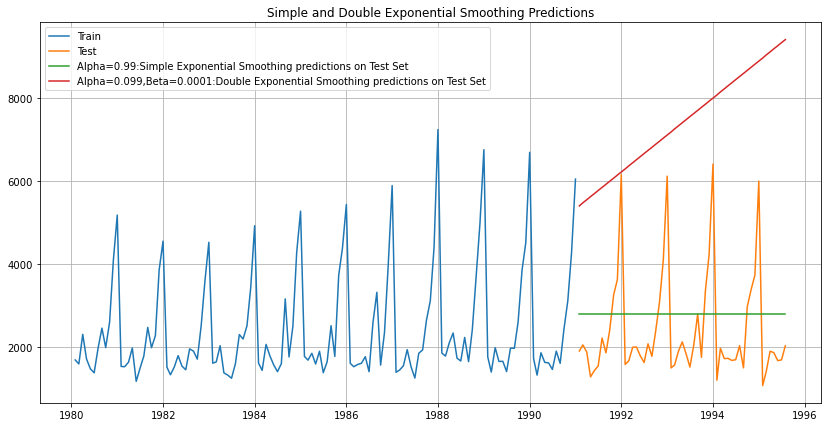

In [41]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.99:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.099,Beta=0.0001:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');

In [42]:
print('DES RMSE:',mean_squared_error(test.values,DES_predict.values,squared=False))

DES RMSE: 5291.8798332269125


In [43]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,DES_predict.values,squared=False)]}
                           ,index=['Alpha=1,Beta=0.0189:DES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha=0.99,SES",1338.008384
"Alpha=1,Beta=0.0189:DES",5291.879833


In [44]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(train,trend='additive',seasonal='additive',initialization_method='estimated')
# Fitting the model
model_TES = model_TES.fit(optimized=True)

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)



==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.10445172087746615, 'smoothing_trend': 0.01093604014460117, 'smoothing_seasonal': 0.48173366787974736, 'damping_trend': nan, 'initial_level': 2363.9138835485714, 'initial_trend': -0.09301259445429122, 'initial_seasons': array([-653.56600429, -736.53385593, -368.26577908, -483.5227771 ,
       -826.11546154, -832.81081219, -386.32510381,   91.54924895,
       -261.07990293,  265.28539181, 1579.92313798, 2619.37089909]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [45]:
 #Forecasting using this model for the duration of the test set
TES_predict =  model_TES.forecast(len(test))
TES_predict

1991-01-31    1502.233432
1991-02-28    1208.098502
1991-03-31    1697.640028
1991-04-30    1553.031185
1991-05-31    1466.595479
1991-06-30    1284.731387
1991-07-31    1806.984162
1991-08-31    1666.327816
1991-09-30    2322.106794
1991-10-31    3229.089225
1991-11-30    4303.421994
1991-12-31    6436.858549
1992-01-31    1496.601351
1992-02-29    1202.466421
1992-03-31    1692.007947
1992-04-30    1547.399104
1992-05-31    1460.963398
1992-06-30    1279.099306
1992-07-31    1801.352081
1992-08-31    1660.695736
1992-09-30    2316.474713
1992-10-31    3223.457144
1992-11-30    4297.789913
1992-12-31    6431.226468
1993-01-31    1490.969271
1993-02-28    1196.834341
1993-03-31    1686.375866
1993-04-30    1541.767024
1993-05-31    1455.331317
1993-06-30    1273.467225
1993-07-31    1795.720001
1993-08-31    1655.063655
1993-09-30    2310.842632
1993-10-31    3217.825064
1993-11-30    4292.157833
1993-12-31    6425.594388
1994-01-31    1485.337190
1994-02-28    1191.202260
1994-03-31  

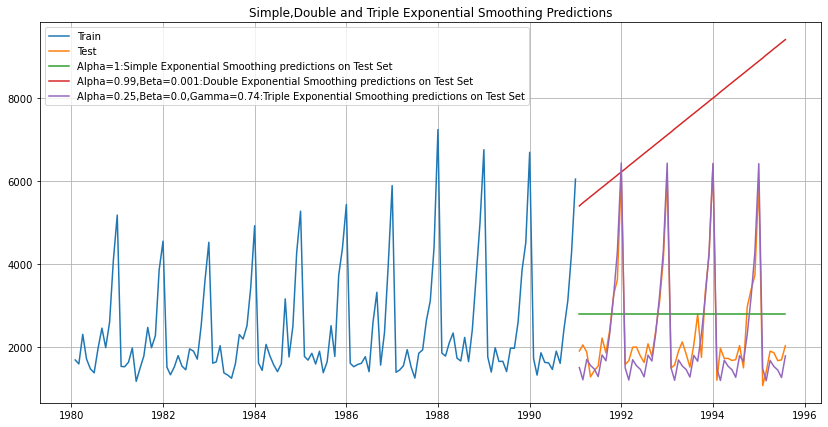

In [46]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=1:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.99,Beta=0.001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.25,Beta=0.0,Gamma=0.74:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

In [47]:
print('TES RMSE:',mean_squared_error(test.values,TES_predict.values,squared=False))

TES RMSE: 377.73332145026274


In [48]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict.values,squared=False)]}
                           ,index=['Alpha=0.25,Beta=0.0,Gamma=0.74:TES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha=0.99,SES",1338.008384
"Alpha=1,Beta=0.0189:DES",5291.879833
"Alpha=0.25,Beta=0.0,Gamma=0.74:TES",377.733321


In [49]:
# Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(train,trend='add',seasonal='multiplicative',initialization_method='estimated')
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)



==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.111049435599969, 'smoothing_trend': 0.04934441604042903, 'smoothing_seasonal': 0.36234516019830915, 'damping_trend': nan, 'initial_level': 2356.499708505957, 'initial_trend': -9.728309340605668, 'initial_seasons': array([0.71397117, 0.68314042, 0.90585281, 0.80629489, 0.65638027,
       0.65449343, 0.88653044, 1.13356122, 0.91978839, 1.21195457,
       1.87113803, 2.37593129]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [50]:
# Forecasting using this model for the duration of the test set
TES_predict_am =  model_TES_am.forecast(len(test))
TES_predict_am

1991-01-31    1587.869279
1991-02-28    1356.638484
1991-03-31    1763.301739
1991-04-30    1656.499666
1991-05-31    1542.345052
1991-06-30    1355.439043
1991-07-31    1854.655907
1991-08-31    1820.711614
1991-09-30    2277.565607
1991-10-31    3122.955334
1991-11-30    4129.808391
1991-12-31    5892.687149
1992-01-31    1538.921553
1992-02-29    1314.710983
1992-03-31    1708.665421
1992-04-30    1605.039761
1992-05-31    1494.307051
1992-06-30    1313.112573
1992-07-31    1796.589222
1992-08-31    1763.558562
1992-09-30    2205.884170
1992-10-31    3024.408627
1992-11-30    3999.146244
1992-12-31    5705.756795
1993-01-31    1489.973827
1993-02-28    1272.783483
1993-03-31    1654.029103
1993-04-30    1553.579855
1993-05-31    1446.269049
1993-06-30    1270.786102
1993-07-31    1738.522537
1993-08-31    1706.405511
1993-09-30    2134.202732
1993-10-31    2925.861919
1993-11-30    3868.484098
1993-12-31    5518.826441
1994-01-31    1441.026101
1994-02-28    1230.855982
1994-03-31  

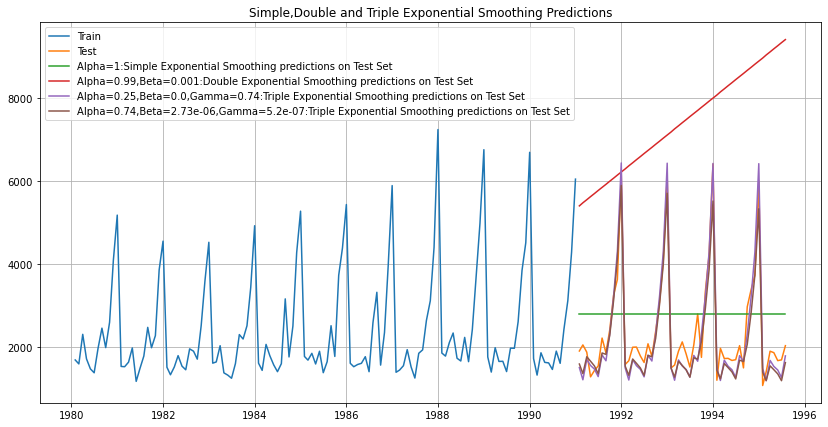

In [51]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=1:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.99,Beta=0.001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.25,Beta=0.0,Gamma=0.74:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_am, label='Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

In [52]:
### Report model accuracy

In [53]:
print('TES_am RMSE:',mean_squared_error(test.values,TES_predict_am.values,squared=False))

TES_am RMSE: 403.11949999600796


In [54]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict_am.values,squared=False)]}
                           ,index=['Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha=0.99,SES",1338.008384
"Alpha=1,Beta=0.0189:DES",5291.879833
"Alpha=0.25,Beta=0.0,Gamma=0.74:TES",377.733321
"Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES",403.119500


In [55]:
## Model 1: Linear Regression

In [56]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+256 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)



Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310]


In [57]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [58]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data')
display(LinearRegression_train.head())
print('Last few rows of Training Data')
display(LinearRegression_train.tail())
print('First few rows of Test Data')
display(LinearRegression_test.head())
print('Last few rows of Test Data')
display(LinearRegression_test.tail())

First few rows of Training Data


,Sparkling,time
Time_Stamp,,
1980-01-31,1686,1
1980-02-29,1591,2
1980-03-31,2304,3
1980-04-30,1712,4
1980-05-31,1471,5


Last few rows of Training Data


,Sparkling,time
Time_Stamp,,
1990-08-31,1605,128
1990-09-30,2424,129
1990-10-31,3116,130
1990-11-30,4286,131
1990-12-31,6047,132


First few rows of Test Data


,Sparkling,time
Time_Stamp,,
1991-01-31,1902,256
1991-02-28,2049,257
1991-03-31,1874,258
1991-04-30,1279,259
1991-05-31,1432,260


Last few rows of Test Data


,Sparkling,time
Time_Stamp,,
1995-03-31,1897,306
1995-04-30,1862,307
1995-05-31,1670,308
1995-06-30,1688,309
1995-07-31,2031,310


In [59]:
from sklearn.linear_model import LinearRegression

In [60]:
lr = LinearRegression()

In [61]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'])

LinearRegression()

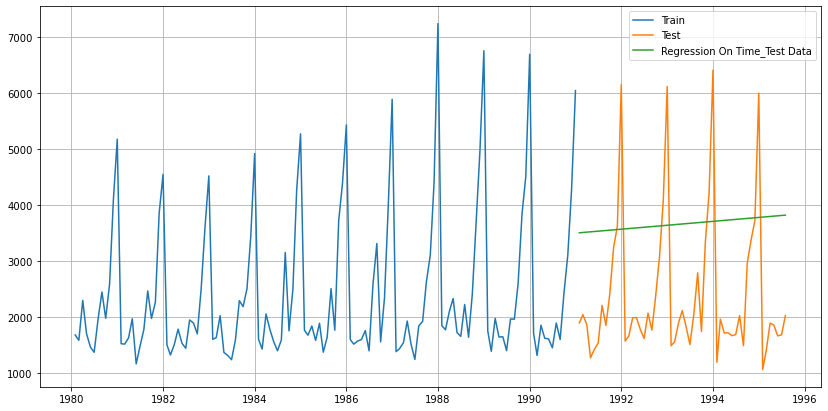

In [62]:
train_predictions_model1         = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.legend(loc='best')
plt.grid();

In [63]:
from sklearn import metrics


In [64]:
rmse_model1_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f " %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1798.201 


In [65]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

,Test RMSE
RegressionOnTime,1798.2007


In [66]:
## Model 2: Naive Approach: $\hat{y}_{t+1} = y_t$

In [67]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [68]:
train.tail()

,Sparkling
Time_Stamp,
1990-08-31,1605
1990-09-30,2424
1990-10-31,3116
1990-11-30,4286
1990-12-31,6047


In [69]:
NaiveModel_test['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_test['naive'].head()

Time_Stamp
1991-01-31    6047
1991-02-28    6047
1991-03-31    6047
1991-04-30    6047
1991-05-31    6047
Name: naive, dtype: int64

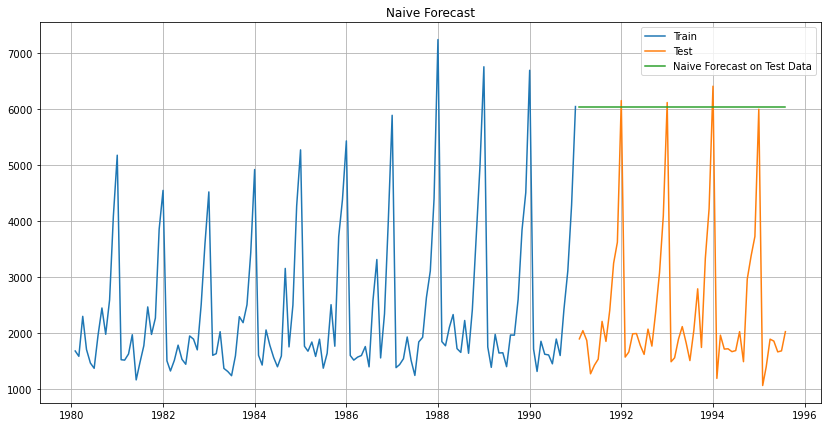

In [70]:
plt.plot(NaiveModel_train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [71]:
### Model Evaluation

In [72]:
rmse_model2_test = metrics.mean_squared_error(test['Sparkling'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 3864.279


In [73]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,Test RMSE
RegressionOnTime,1798.200700
NaiveModel,3864.279352


In [74]:
## Method 3: Simple Average

In [75]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [76]:
SimpleAverage_test['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_test.head()

,Sparkling,mean_forecast
Time_Stamp,,
1991-01-31,1902,2403.780303
1991-02-28,2049,2403.780303
1991-03-31,1874,2403.780303
1991-04-30,1279,2403.780303
1991-05-31,1432,2403.780303


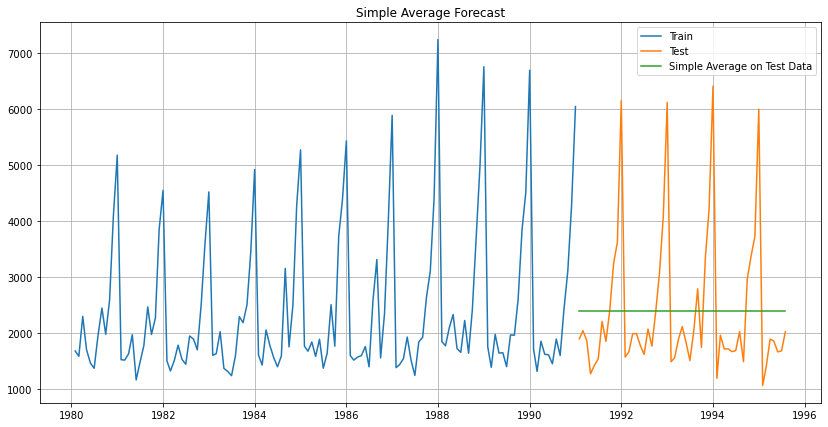

In [77]:
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [78]:
### Model Evaluation

In [79]:
rmse_model3_test = metrics.mean_squared_error(test['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 1275.082


In [80]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]}
                           ,index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Test RMSE
RegressionOnTime,1798.200700
NaiveModel,3864.279352
SimpleAverageModel,1275.081804


# 5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.
 

In [81]:
## Check for stationarity of the whole Time Series data.

In [82]:
from statsmodels.tsa.stattools import adfuller

In [83]:
dftest = adfuller(dfr,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -1.798
DF test p-value is 0.7055958459932372
Number of lags used 12


In [84]:
dftest = adfuller(dfr.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -44.912
DF test p-value is 0.0
Number of lags used 10


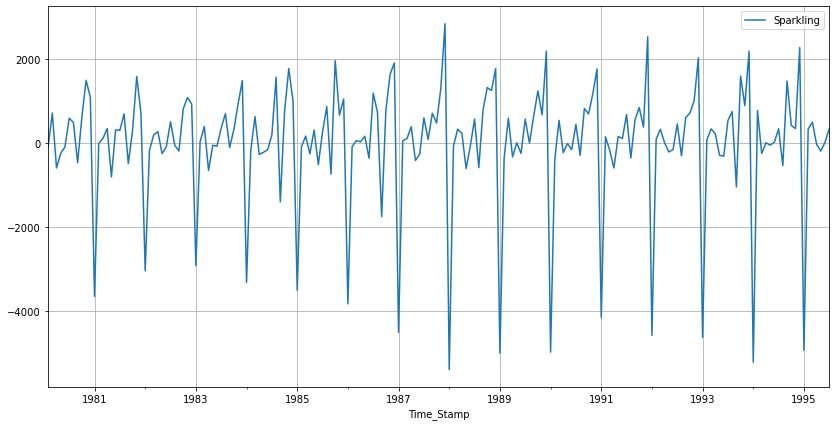

In [85]:
dfr.diff().dropna().plot(grid=True);

In [86]:
## Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data.

In [87]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

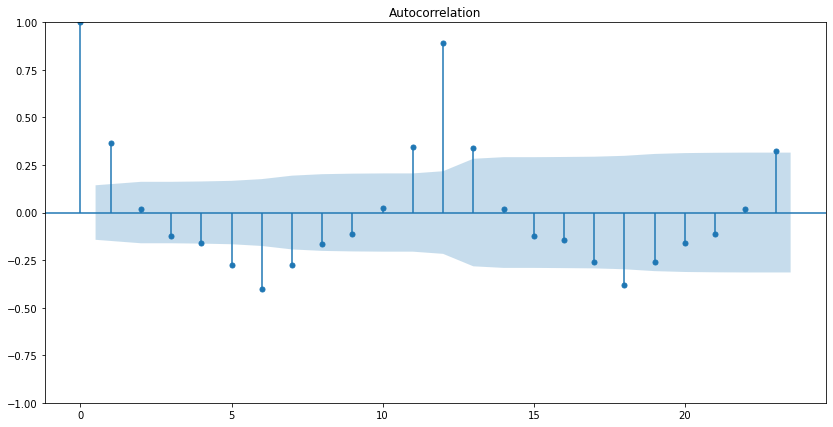

In [88]:
plot_acf(dfr,alpha=0.05);

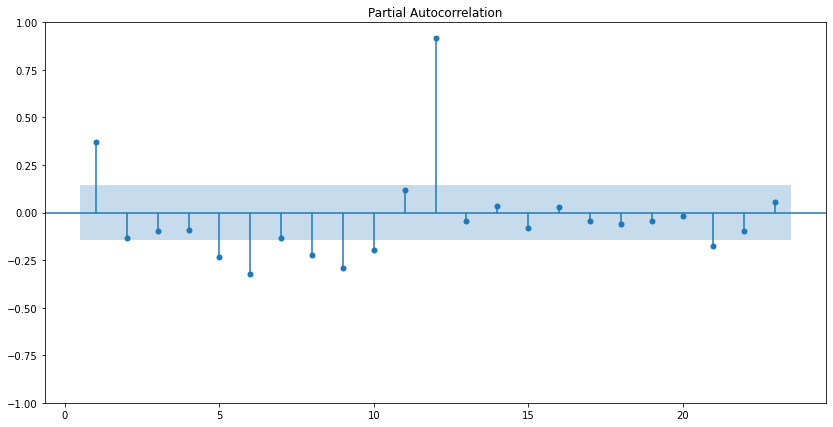

In [89]:
plot_pacf(dfr,zero=False,alpha=0.05);

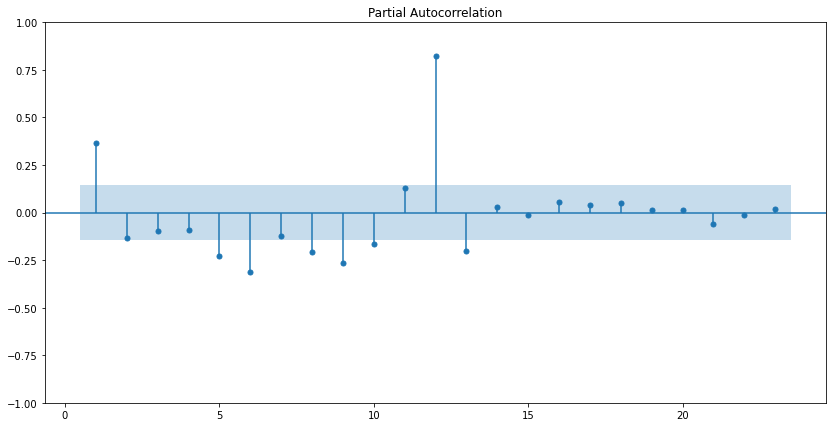

In [90]:
plot_pacf(dfr,zero=False,alpha=0.05,method='ywmle');

In [91]:
dfr.index.year.unique()

Int64Index([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
            1991, 1992, 1993, 1994, 1995],
           dtype='int64', name='Time_Stamp')

In [92]:
train = dfr[dfr.index<='1991'] 
test = dfr[dfr.index>'1991']

In [93]:
## This is to display multiple data frames from one cell
from IPython.display import display

In [94]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,Sparkling
Time_Stamp,
1980-01-31,1686
1980-02-29,1591
1980-03-31,2304
1980-04-30,1712
1980-05-31,1471


Last few rows of Training Data


,Sparkling
Time_Stamp,
1990-08-31,1605
1990-09-30,2424
1990-10-31,3116
1990-11-30,4286
1990-12-31,6047


First few rows of Test Data


,Sparkling
Time_Stamp,
1991-01-31,1902
1991-02-28,2049
1991-03-31,1874
1991-04-30,1279
1991-05-31,1432


Last few rows of Test Data


,Sparkling
Time_Stamp,
1995-03-31,1897
1995-04-30,1862
1995-05-31,1670
1995-06-30,1688
1995-07-31,2031


In [95]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


In [96]:
    ## Check for stationarity of the Training Data Time Series.

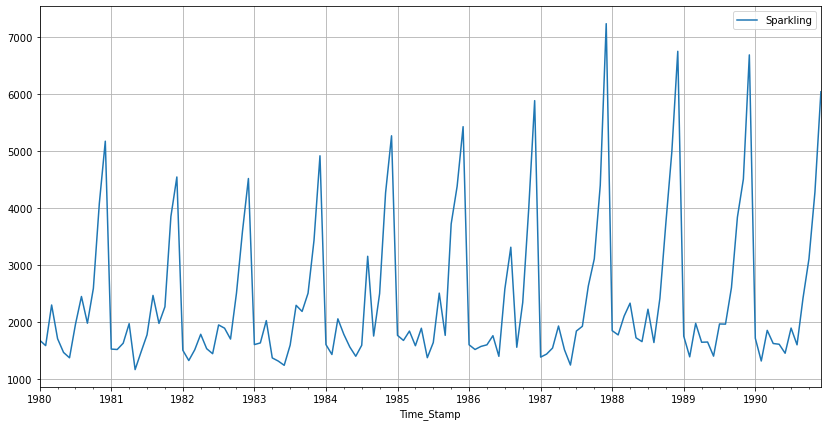

In [97]:
train.plot(grid=True);

In [98]:
dftest = adfuller(train,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -2.062
DF test p-value is 0.5674110388593689
Number of lags used 12


In [99]:
dftest = adfuller(train.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -7.968
DF test p-value is 8.479210655514579e-11
Number of lags used 11


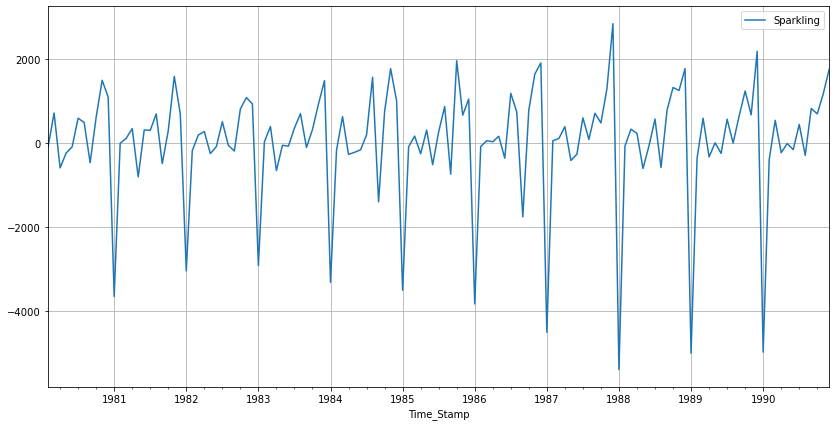

In [100]:
train.diff().dropna().plot(grid=True);

In [101]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1980-01-31 to 1990-12-31
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  132 non-null    int64
dtypes: int64(1)
memory usage: 2.1 KB


# 6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.


In [102]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Examples of the parameter combinations for the Model')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [103]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [104]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:# running a loop within the pdq parameters defined by itertools
    ARIMA_model = ARIMA(train['Sparkling'].values,order=param).fit()#fitting the ARIMA model
    #using the parameters from the loop
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))#printing the parameters and the AIC
    #from the fitted models
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
    #appending the AIC values and the model parameters to the previously created data frame
    #for easier understanding and sorting of the AIC values

ARIMA(0, 1, 0) - AIC:2267.6630357855465
ARIMA(0, 1, 1) - AIC:2263.060015591336
ARIMA(0, 1, 2) - AIC:2234.4083231250597
ARIMA(0, 1, 3) - AIC:2233.9948577308583
ARIMA(1, 1, 0) - AIC:2266.6085393190087
ARIMA(1, 1, 1) - AIC:2235.7550946730316
ARIMA(1, 1, 2) - AIC:2234.5272004519475
ARIMA(1, 1, 3) - AIC:2235.6078073258223
ARIMA(2, 1, 0) - AIC:2260.3657439680874
ARIMA(2, 1, 1) - AIC:2233.777626337368
ARIMA(2, 1, 2) - AIC:2213.5092123397917
ARIMA(2, 1, 3) - AIC:2232.8804874614534
ARIMA(3, 1, 0) - AIC:2257.7233789979396
ARIMA(3, 1, 1) - AIC:2235.4985686284235
ARIMA(3, 1, 2) - AIC:2230.773429940231
ARIMA(3, 1, 3) - AIC:2221.455189315694


In [105]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

,param,AIC
10,"(2, 1, 2)",2213.509212
15,"(3, 1, 3)",2221.455189
14,"(3, 1, 2)",2230.77343
11,"(2, 1, 3)",2232.880487
9,"(2, 1, 1)",2233.777626


In [106]:
auto_ARIMA = ARIMA(train, order=(2,1,2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1101.755
Date:                Sat, 26 Nov 2022   AIC                           2213.509
Time:                        17:09:30   BIC                           2227.885
Sample:                    01-31-1980   HQIC                          2219.351
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3121      0.046     28.781      0.000       1.223       1.401
ar.L2         -0.5593      0.072     -7.741      0.000      -0.701      -0.418
ma.L1         -1.9917      0.109    -18.217      0.0

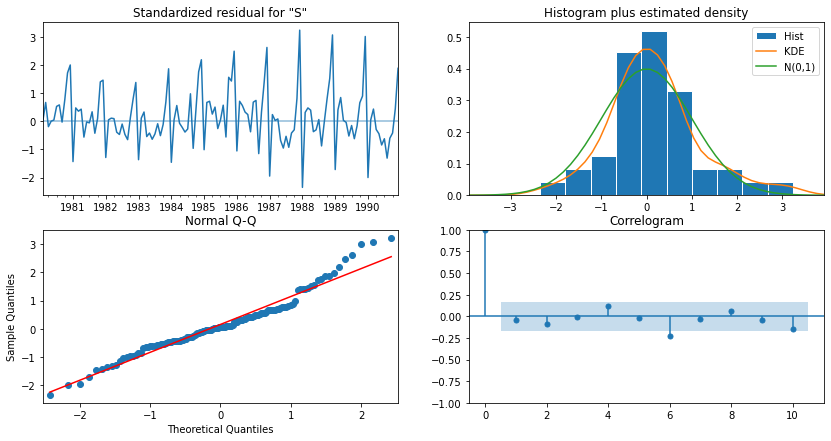

In [107]:
results_auto_ARIMA.plot_diagnostics();

In [108]:
## Predict on the Test Set using this model and evaluate the model.

In [109]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [110]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

## Importing the mean_squared_error function from sklearn to calculate the RMSE

from sklearn.metrics import mean_squared_error

In [111]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['Sparkling'],predicted_auto_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 1299.979773687031 
MAPE: 47.099973377448464


In [112]:
resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['ARIMA(2,1,2)'])

resultsDf

,RMSE,MAPE
"ARIMA(2,1,2)",1299.979774,47.099973


In [113]:
#SARIMA

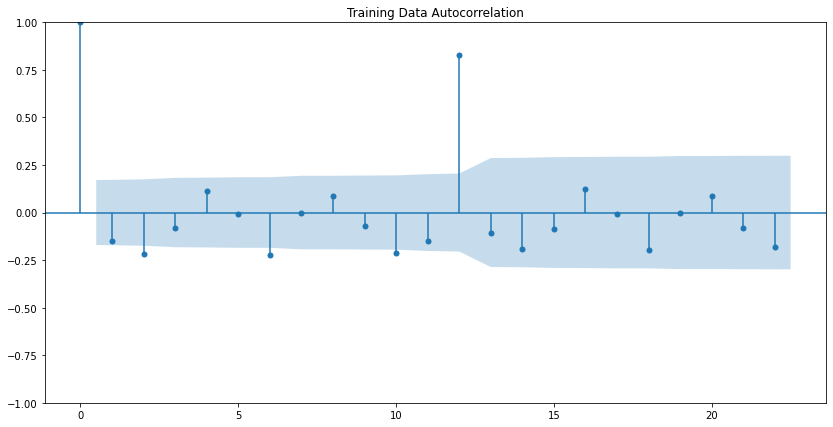

In [114]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop');

In [115]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 5) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 5)
Model: (0, 1, 2)(0, 0, 2, 5)
Model: (1, 1, 0)(1, 0, 0, 5)
Model: (1, 1, 1)(1, 0, 1, 5)
Model: (1, 1, 2)(1, 0, 2, 5)
Model: (2, 1, 0)(2, 0, 0, 5)
Model: (2, 1, 1)(2, 0, 1, 5)
Model: (2, 1, 2)(2, 0, 2, 5)


In [116]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [117]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 5) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 5) - AIC:2171.0830881785446
SARIMA(0, 1, 0)x(0, 0, 2, 5) - AIC:2083.1127841149278
SARIMA(0, 1, 0)x(1, 0, 0, 5) - AIC:2187.600302905569
SARIMA(0, 1, 0)x(1, 0, 1, 5) - AIC:2167.2864121928055
SARIMA(0, 1, 0)x(1, 0, 2, 5) - AIC:2081.2906703173476
SARIMA(0, 1, 0)x(2, 0, 0, 5) - AIC:2100.30022081435
SARIMA(0, 1, 0)x(2, 0, 1, 5) - AIC:2098.652595683471
SARIMA(0, 1, 0)x(2, 0, 2, 5) - AIC:2077.7988170904837
SARIMA(0, 1, 1)x(0, 0, 0, 5) - AIC:2230.162907850583
SARIMA(0, 1, 1)x(0, 0, 1, 5) - AIC:2128.777063205541
SARIMA(0, 1, 1)x(0, 0, 2, 5) - AIC:2041.1271725346335
SARIMA(0, 1, 1)x(1, 0, 0, 5) - AIC:2169.636656219092
SARIMA(0, 1, 1)x(1, 0, 1, 5) - AIC:2126.1434390644727
SARIMA(0, 1, 1)x(1, 0, 2, 5) - AIC:2049.0852074800778
SARIMA(0, 1, 1)x(2, 0, 0, 5) - AIC:2093.795103018392
SARIMA(0, 1, 1)x(2, 0, 1, 5) - AIC:2079.017658067907
SARIMA(0, 1, 1)x(2, 0, 2, 5) - AIC:2042.0290054498128
SARIMA(0, 1, 2)x(0, 0, 0, 5) - AIC:21

In [118]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
71,"(2, 1, 1)","(2, 0, 2, 5)",2002.228392
74,"(2, 1, 2)","(0, 0, 2, 5)",2011.391206
77,"(2, 1, 2)","(1, 0, 2, 5)",2013.068035
80,"(2, 1, 2)","(2, 0, 2, 5)",2013.727537
20,"(0, 1, 2)","(0, 0, 2, 5)",2015.836489


In [133]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['Sparkling'],
                                order=(2,1,1),
                                seasonal_order=(2,0,2,5),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

                                       SARIMAX Results                                        
Dep. Variable:                              Sparkling   No. Observations:                  132
Model:             SARIMAX(2, 1, 1)x(2, 0, [1, 2], 5)   Log Likelihood                -993.114
Date:                                Sat, 26 Nov 2022   AIC                           2002.228
Time:                                        17:12:36   BIC                           2024.461
Sample:                                    01-31-1980   HQIC                          2011.257
                                         - 12-31-1990                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0495      0.108      0.459      0.646      -0.162       0.261
ar.

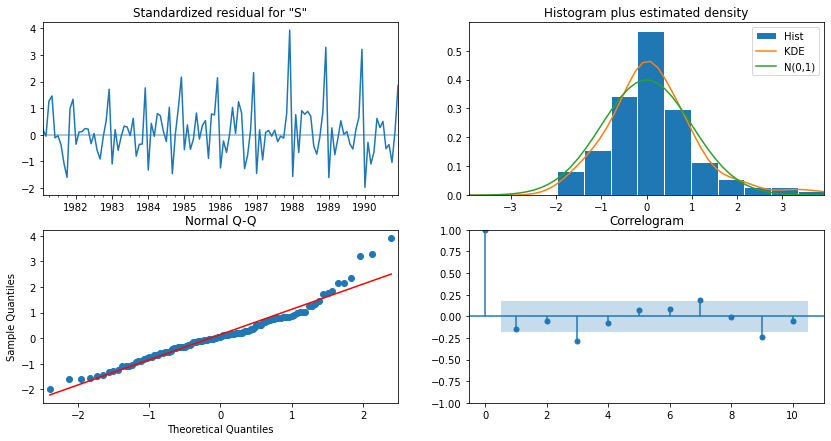

In [134]:
results_auto_SARIMA.plot_diagnostics();

In [135]:
## Predict on the Test Set using this model and evaluate the model.

In [136]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [137]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

Sparkling,mean,mean_se,mean_ci_lower,mean_ci_upper
1991-01-31,3767.111822,968.955423,1867.994089,5666.229554
1991-02-28,2178.329021,973.157180,270.975997,4085.682044
1991-03-31,1881.587318,1032.297835,-141.679261,3904.853897
1991-04-30,1712.951535,1032.318837,-310.356206,3736.259275
1991-05-31,884.749947,1045.231973,-1163.867075,2933.366970


In [138]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['Sparkling'],predicted_auto_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 1114.5969412125685 
MAPE: 46.256971159192965


In [139]:
temp_resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['SARIMA(2,1,1)(2,0,2,5)'])

resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE,MAPE
"ARIMA(2,1,2)",1299.979774,47.099973
"SARIMA(1,1,3)(3,0,3,6)",872.912606,38.837631
"ARIMA(4,1,4)",1218.084201,40.481177
"SARIMA(2,1,1)(2,0,2,5)",1114.596941,46.256971


# 7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.


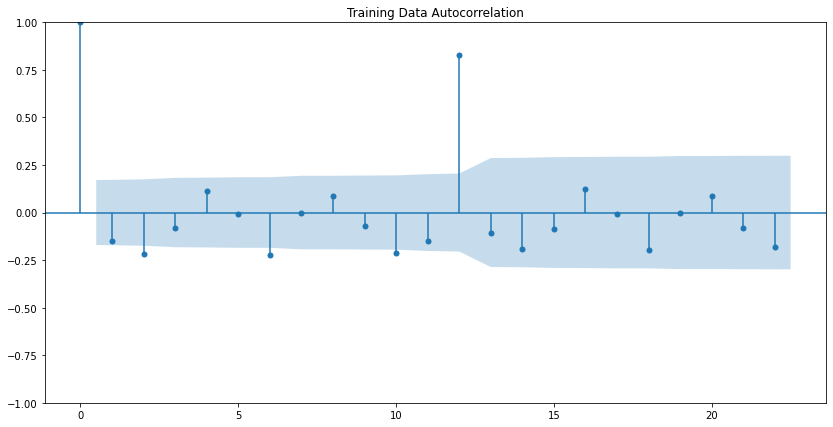

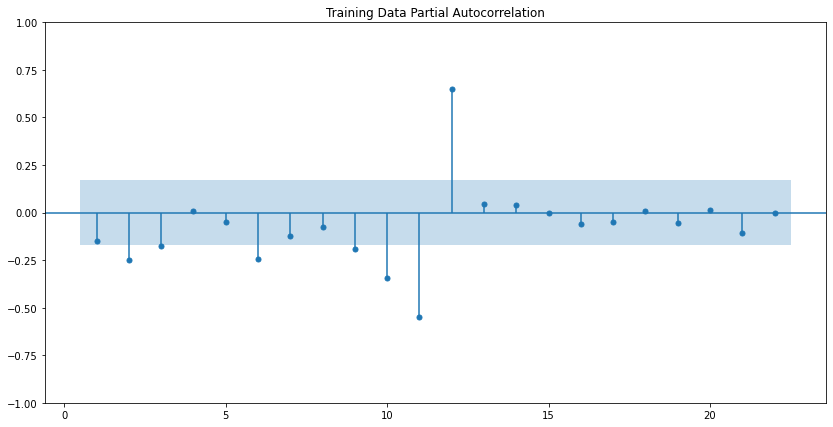

In [140]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop')
plot_pacf(train.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle')
plt.show()

In [141]:
manual_ARIMA = ARIMA(train['Sparkling'], order=(4,1,4),freq='M')

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(4, 1, 4)   Log Likelihood               -1097.900
Date:                Sat, 26 Nov 2022   AIC                           2213.800
Time:                        17:24:07   BIC                           2239.677
Sample:                    01-31-1980   HQIC                          2224.315
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4335      0.138     -3.141      0.002      -0.704      -0.163
ar.L2         -0.4357      0.066     -6.623      0.000      -0.565      -0.307
ar.L3         -0.4356      0.121     -3.589      0.0

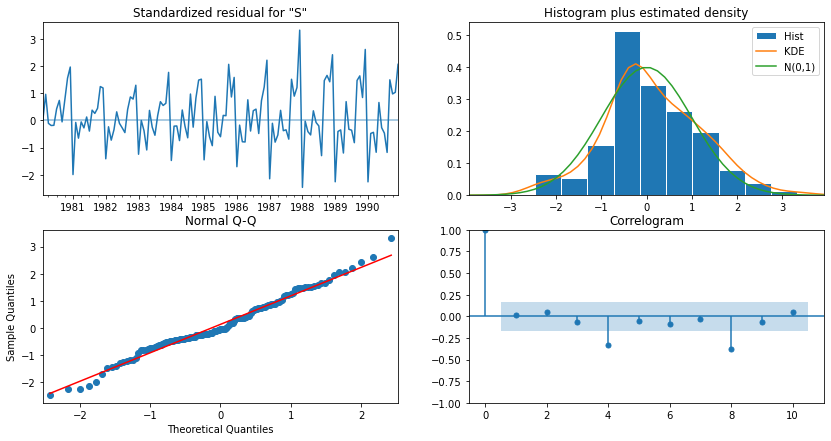

In [142]:
results_manual_ARIMA.plot_diagnostics();

In [143]:
## Predict on the Test Set using this model and evaluate the model.

In [144]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [145]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['Sparkling'],predicted_manual_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 1218.0842005744419 
MAPE: 40.48117728094749


In [146]:
temp_resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['ARIMA(4,1,4)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE,MAPE
"ARIMA(2,1,2)",1299.979774,47.099973
"SARIMA(1,1,3)(3,0,3,6)",872.912606,38.837631
"ARIMA(4,1,4)",1218.084201,40.481177
"SARIMA(2,1,1)(2,0,2,5)",1114.596941,46.256971
"ARIMA(4,1,4)",1218.084201,40.481177


In [147]:
#SARIMA

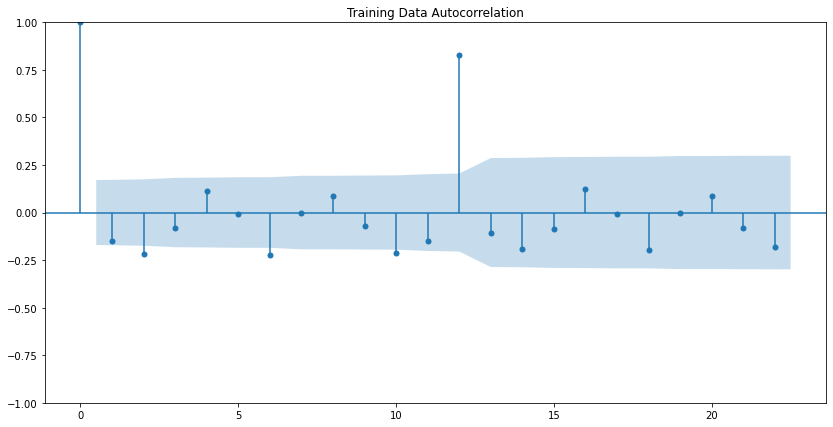

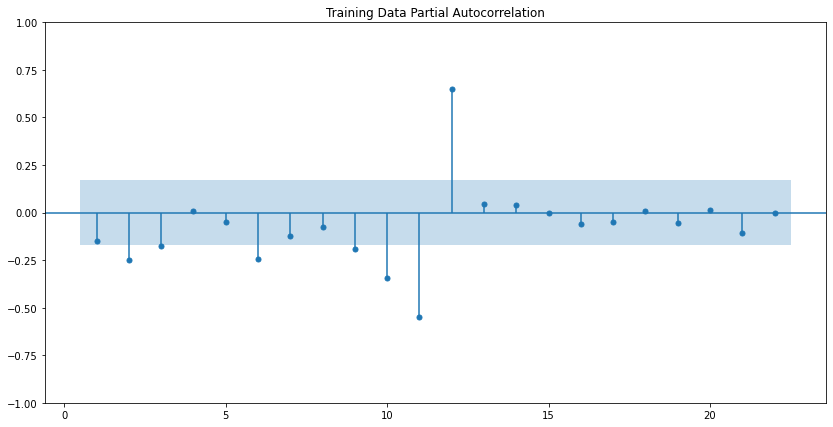

In [148]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop')
plot_pacf(train.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle');



In [149]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(train['Sparkling'],
                                order=(3,1,3),
                                seasonal_order=(0, 0, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

                                     SARIMAX Results                                     
Dep. Variable:                         Sparkling   No. Observations:                  132
Model:             SARIMAX(3, 1, 3)x(0, 0, 3, 6)   Log Likelihood                -875.634
Date:                           Sat, 26 Nov 2022   AIC                           1771.267
Time:                                   17:25:06   BIC                           1798.181
Sample:                               01-31-1980   HQIC                          1782.182
                                    - 12-31-1990                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1904      0.170     -6.998      0.000      -1.524      -0.857
ar.L2         -0.2044      0.137     -1.489

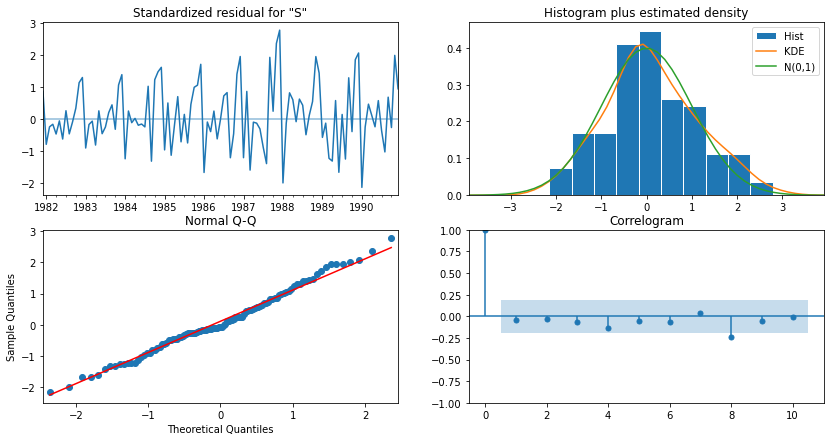

In [150]:
results_manual_SARIMA.plot_diagnostics()
plt.show()

In [151]:
## Predict on the Test Set using this model and evaluate the model.

In [152]:
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(test))

In [153]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['Sparkling'],predicted_manual_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 1175.1409079362181 
MAPE: 38.3135092025746


In [154]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse],'MAPE':mape}
                           ,index=['SARIMA(3,1,3)(0,0,3,6)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE,MAPE
"ARIMA(2,1,2)",1299.979774,47.099973
"SARIMA(1,1,3)(3,0,3,6)",872.912606,38.837631
"ARIMA(4,1,4)",1218.084201,40.481177
"SARIMA(2,1,1)(2,0,2,5)",1114.596941,46.256971
"ARIMA(4,1,4)",1218.084201,40.481177
"SARIMA(3,1,3)(0,0,3,6)",1175.140908,38.313509


# 8. Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.


In [155]:
## Building the most optimum model on the Full Data.

In [158]:
full_data_model = sm.tsa.statespace.SARIMAX(dfr['Sparkling'],
                                order=(0,1,2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

                                     SARIMAX Results                                     
Dep. Variable:                         Sparkling   No. Observations:                  187
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 6)   Log Likelihood               -1258.196
Date:                           Sat, 26 Nov 2022   AIC                           2530.391
Time:                                   18:07:28   BIC                           2552.383
Sample:                               01-31-1980   HQIC                          2539.315
                                    - 07-31-1995                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9479      0.106     -8.973      0.000      -1.155      -0.741
ma.L2         -0.1247      0.087     -1.441

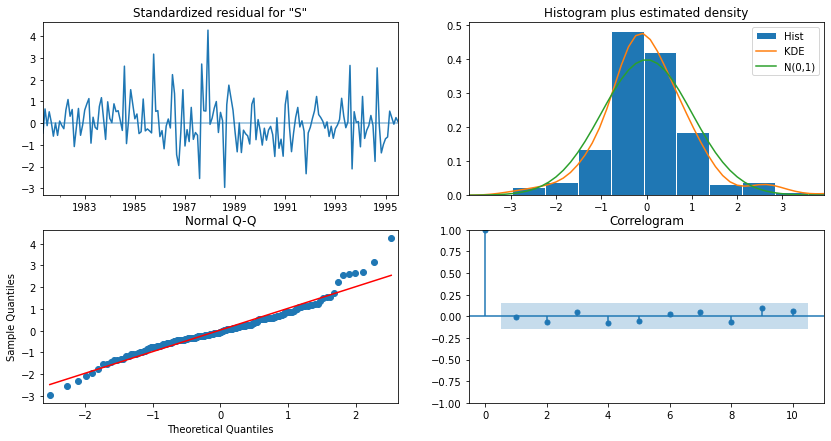

In [159]:
results_full_data_model.plot_diagnostics();

# 9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.


In [160]:
predicted_manual_SARIMA_6_full_data = results_full_data_model.get_forecast(steps=12)

In [161]:
predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).head()

Sparkling,mean,mean_se,mean_ci_lower,mean_ci_upper
1995-08-31,1864.148257,372.572662,1133.919257,2594.377257
1995-09-30,2393.363665,378.431940,1651.650692,3135.076639
1995-10-31,3285.328488,379.282331,2541.948780,4028.708197
1995-11-30,4017.494940,380.130824,3272.452215,4762.537665
1995-12-31,6286.102218,380.977434,5539.400169,7032.804268


In [163]:
rmse = mean_squared_error(dfr['Sparkling'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 531.977225771907


In [171]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1996-01-31',end='1996-12-31', freq='M'))

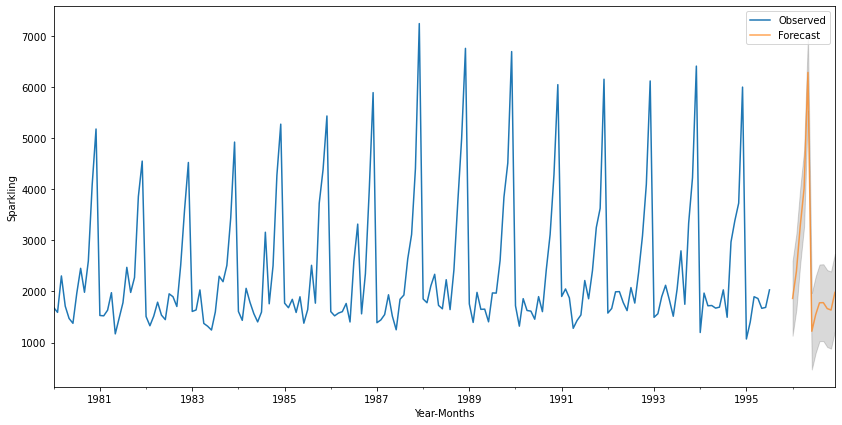

In [172]:
# plot the forecast along with the confidence band

axis = dfr['Sparkling'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sparkling')
plt.legend(loc='best')
plt.show()

In [173]:
resultsDf

,RMSE,MAPE
"ARIMA(2,1,2)",1299.979774,47.099973
"SARIMA(1,1,3)(3,0,3,6)",872.912606,38.837631
"ARIMA(4,1,4)",1218.084201,40.481177
"SARIMA(2,1,1)(2,0,2,5)",1114.596941,46.256971
"ARIMA(4,1,4)",1218.084201,40.481177
"SARIMA(3,1,3)(0,0,3,6)",1175.140908,38.313509


# END